<a href="https://colab.research.google.com/github/karthikasi/Task-7/blob/main/DataPreprocessing_Assignment11_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




**Step 2: Importing dataset**

In [81]:
df=pd.read_csv("Data.csv.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


**Step 3: Handling the missing data**

In [82]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

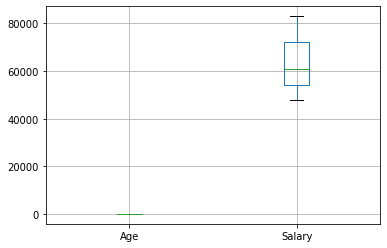

In [83]:
df.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


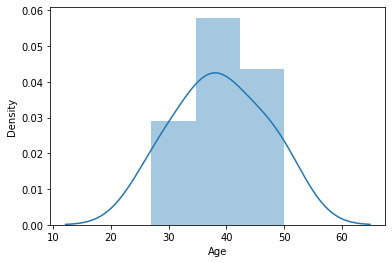

In [84]:
sns.distplot(df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


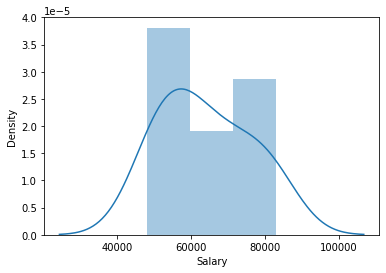

In [85]:
sns.distplot(df['Salary'])

In [86]:
df['Age']=df["Age"].fillna(df['Age'].mean())
df['Salary']=df['Salary'].fillna(df['Salary'].mean())
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


**Step 4: Encoding categorical data**

In [87]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['Purchased']=labelencoder.fit_transform(df['Purchased'])
#  or df.Purchased = df.Purchased.map({'No': 0,'Yes': 1})
df.head()


,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,0
1,Spain,27.0,48000.000000,1
2,Germany,30.0,54000.000000,0
3,Spain,38.0,61000.000000,0
4,Germany,40.0,63777.777778,1


**Step 5: Creating a dummy variable**

In [88]:
df = pd.get_dummies(df)
df.head()

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.000000,0,1,0,0
1,27.0,48000.000000,1,0,0,1
2,30.0,54000.000000,0,0,1,0
3,38.0,61000.000000,0,0,0,1
4,40.0,63777.777778,1,0,1,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [89]:
X=df[['Age','Salary','Country_France','Country_Germany','Country_Spain']].values
y=df["Purchased"]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

**Step 7: Feature Scaling**

In [91]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
Scaler.fit(X_train)
Scaled_X_train=Scaler.transform(X_train)
Scaled_X_test= Scaler.transform(X_test)

In [93]:
Scaled_X_train

array([[-0.19159184, -1.07812594, -0.77459667, -0.57735027,  1.29099445],
       [-0.01411729, -0.07013168, -0.77459667,  1.73205081, -0.77459667],
       [ 0.56670851,  0.63356243,  1.29099445, -0.57735027, -0.77459667],
       [-0.30453019, -0.30786617, -0.77459667, -0.57735027,  1.29099445],
       [-1.90180114, -1.42046362, -0.77459667, -0.57735027,  1.29099445],
       [ 1.14753431,  1.23265336,  1.29099445, -0.57735027, -0.77459667],
       [ 1.43794721,  1.57499104, -0.77459667,  1.73205081, -0.77459667],
       [-0.74014954, -0.56461943,  1.29099445, -0.57735027, -0.77459667]])

In [94]:
Scaled_X_test

array([[-1.46618179, -0.9069571 , -0.77459667,  1.73205081, -0.77459667],
       [-0.44973664,  0.20564034,  1.29099445, -0.57735027, -0.77459667]])

In [95]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=1)
classifier.fit(Scaled_X_train,y_train)   

LogisticRegression(random_state=1)

In [96]:
y_pred=classifier.predict(Scaled_X_test)
y_pred

array([1, 1])

confusion matrix :  [[0 1]
 [0 1]]


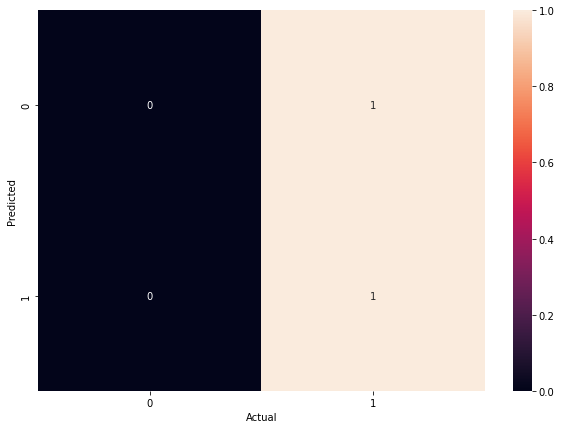

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
print("confusion matrix : ",cm)

In [98]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test,y_pred))

Accuracy : 0.5
